# Power Laws: Detecting Anomalies in Usage
Energy consumption of buildings has steadily increased. There is an increasing realization that many buildings do not perform as intended by their designers. Typical buildings consume 20% more energy than necessary due to faulty construction, malfunctioning equipment, incorrectly configured control systems and inappropriate operating procedures.

The building systems may fail to meet the performance expectations due to various faults. Poorly maintained, degraded, and improperly controlled equipment wastes an estimated 15% to 30% of energy used in commercial buildings.

Therefore, it is of great potential to develop automatic, quick-responding, accurate and reliable fault detection and to provide diagnosis schemes to ensure the optimal operations of systems to save energy.

Schneider Electric already has relevant offers, but would like to determine if alternative techniques can add new detections / functionalities, bring gain in precision, or operate with less data.

https://search.library.northwestern.edu/primo-explore/fulldisplay?docid=01NWU_HATHI_TRUSTMIU01-100664356&context=L&vid=NULVNEW&search_scope=NWU&tab=default_tab&lang=en_US

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import power_utils

%matplotlib inline

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = power_utils.import_data()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.head()

,meter_id,Timestamp,Values,Date,site_id,meter_description,units,surface,activity,Holiday,Temperature,Distance
0,2,2015-06-11 00:00:00,2035.0,2015-06-11,334_61,main meter,Wh,2000.0,office,-1,19.4,19.734144
1,2,2015-06-11 00:00:00,2035.0,2015-06-11,334_61,main meter,Wh,2000.0,office,-1,19.5,17.135873
2,2,2015-06-11 00:00:00,2035.0,2015-06-11,334_61,main meter,Wh,2000.0,office,-1,21.2,12.083004
3,2,2015-06-11 00:15:00,2074.0,2015-06-11,334_61,main meter,Wh,2000.0,office,-1,-1.0,-1.000000
4,2,2015-06-11 00:30:00,2062.0,2015-06-11,334_61,main meter,Wh,2000.0,office,-1,-1.0,-1.000000


In [4]:
train.dtypes

meter_id                     object
Timestamp            datetime64[ns]
Values                      float64
Date                         object
site_id                      object
meter_description            object
units                        object
surface                     float64
activity                     object
Holiday                      object
Temperature                 float64
Distance                    float64
dtype: object

In [5]:
train.describe()

,Values,surface,Temperature,Distance
count,4.389735e+07,4.389735e+07,4.389735e+07,4.389735e+07
mean,9.230425e+07,1.972861e+02,-4.339177e-01,-6.256935e-01
std,4.292906e+11,1.035032e+03,3.136976e+00,2.020825e+00
min,-4.838107e+06,-1.000000e+00,-3.300000e+00,-1.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,8.000000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00
75%,2.642400e+05,-1.000000e+00,-1.000000e+00,-1.000000e+00
max,2.011201e+15,5.750000e+03,4.400000e+01,2.745594e+01


In [6]:
sum(train.duplicated())

64

In [7]:
train = train.drop_duplicates()

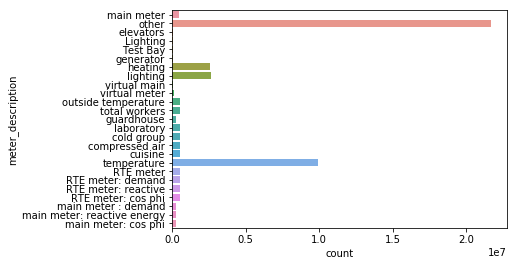

In [8]:
sns.countplot(y="meter_description", data=train);

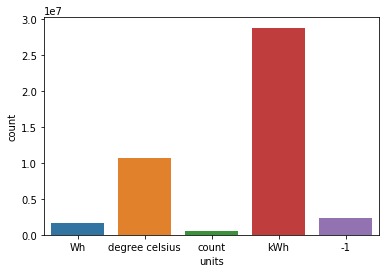

In [9]:
sns.countplot(x="units", data=train);

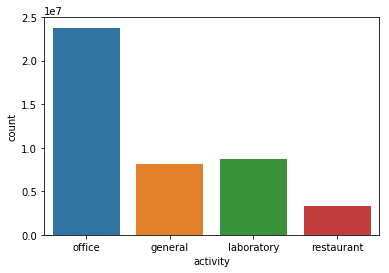

In [10]:
sns.countplot(x="activity", data=train);

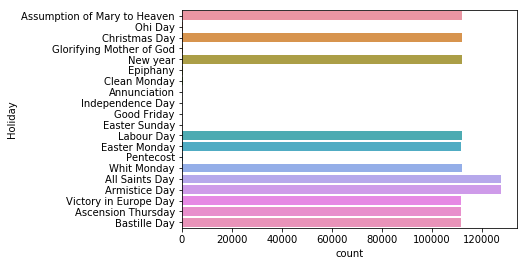

In [12]:
sns.countplot(y='Holiday', data=train[train.Holiday != -1]);